<a href="https://colab.research.google.com/github/sundar-nallalagappan/Plant-Seedling-Classification/blob/main/Plant_seedling_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("sairam")

sairam


In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Import required libraries

In [3]:
import pandas as pd
import numpy as np

import pathlib
import tensorflow as tf
print(tf.__version__)
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, BatchNormalization, MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard


2.9.2


In [4]:
root_dir  = '/content/gdrive/MyDrive/plant-seedlings-classification'
train_dir = 'train'
test_dir  = 'test'
train_dir_path = os.path.join(root_dir, train_dir)
test_dir_path  = os.path.join(root_dir, test_dir)

print(f"Train dir path {train_dir_path}")
print(f"Test dir path  {test_dir_path}")

Train dir path /content/gdrive/MyDrive/plant-seedlings-classification/train
Test dir path  /content/gdrive/MyDrive/plant-seedlings-classification/test


Train directory count

In [10]:
class_count = {}
total_count = 0

for dir in os.listdir(train_dir_path):
    #print(f"{dir} has {len(os.listdir(os.path.join(train_dir_path, dir)))} images")
    class_count.update({dir:len(os.listdir(os.path.join(train_dir_path, dir)))})
    total_count += len(os.listdir(os.path.join(train_dir_path, dir)))
print(f"Total number of images in train dataset is {total_count}")
class_count

Total number of images in train dataset is 4803


{'Common Chickweed': 612,
 'Maize': 222,
 'Scentless Mayweed': 518,
 'Loose Silky-bent': 655,
 'Small-flowered Cranesbill': 517,
 'Fat Hen': 476,
 'Sugar beet': 386,
 'Common wheat': 222,
 'Shepherds Purse': 242,
 'Cleavers': 288,
 'Black-grass': 274,
 'Charlock': 391}

Test directory count

In [6]:
print(f"Number of images in Test directory: {len(os.listdir(test_dir_path))}")

Number of images in Test directory: 794


Number of classes: 12 <br>
Number of train images: 4750 <br>
Number of test images : 794 <br>

### Load using keras.preprocessing
### Creating the dataset

tf.keras.preprocessing.image_dataset_from_directory ==> <br>
1) No need to prepare the labels separately - Directory name will be infered automattically <br>
2) In batches the data can be fed

In [8]:
batch_size=32

#Original image will be resized to below dimensions
image_height = 120   
image_width  = 120

Prepare train ds using tf 

In [25]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
            train_dir_path,
            labels="inferred",
            label_mode="categorical",
            class_names=None,
            color_mode="rgb",
            batch_size=batch_size,
            image_size=(image_height, image_width),
            shuffle=True,
            seed=1702,
            validation_split=0.2,
            subset="training",
            interpolation="bilinear",
            follow_links=False,
            crop_to_aspect_ratio=False
        )

Found 4791 files belonging to 12 classes.
Using 3833 files for training.


Prepare validation ds using tf 

In [26]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
            train_dir_path,
            labels="inferred",
            label_mode="categorical",
            class_names=None,
            color_mode="rgb",
            batch_size=batch_size,
            image_size=(image_height, image_width),
            shuffle=True,
            seed=1702,
            validation_split=0.2,
            subset="validation",
            interpolation="bilinear",
            follow_links=False,
            crop_to_aspect_ratio=False
        )

Found 4791 files belonging to 12 classes.
Using 958 files for validation.


In [11]:
labels = os.listdir(train_dir_path)
print(len(labels))
print(f"Labels to be predicted are {labels}")


12
Labels to be predicted are ['Common Chickweed', 'Maize', 'Scentless Mayweed', 'Loose Silky-bent', 'Small-flowered Cranesbill', 'Fat Hen', 'Sugar beet', 'Common wheat', 'Shepherds Purse', 'Cleavers', 'Black-grass', 'Charlock']


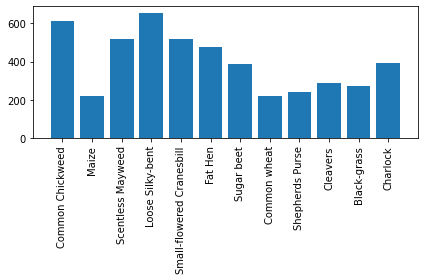

In [12]:
keys = class_count.keys()
val  = class_count.values()
plt.bar(keys, val)
plt.xticks(rotation=90)
plt.tight_layout()

0
1
2
3
4
5
6
7
8


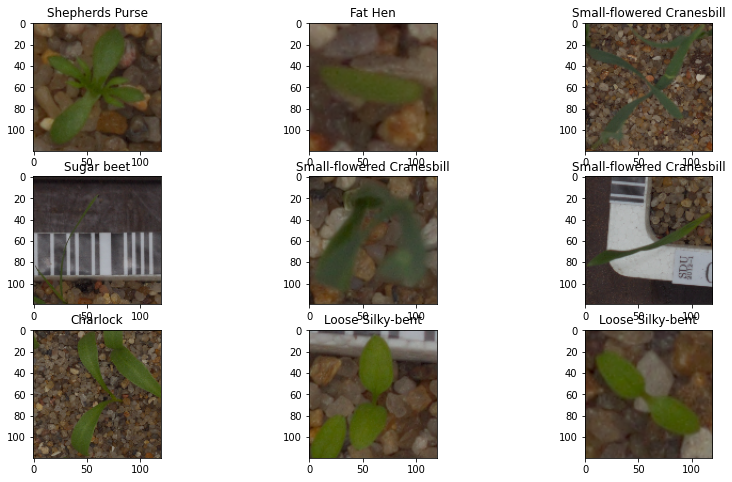

In [29]:
plt.figure(figsize=(14,8))
for image, label in train_ds.take(1):
    for i in range(9):
        print(i)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(labels[np.argmax(label[i])])
    plt.show()

## Modelling

In [30]:
#Specify the input shape with dimensions
Channels = 3
input_shape = (image_height, image_width, Channels)

#Number of classes of plant seedlings
num_classes=len(labels)

#Instantiate the schema
model = Sequential()

#Add input layer with rescaling performed
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0, input_shape=input_shape))

#First convolution layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

#Second convolution layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

#Third convolution layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

#Fourth convolution layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

#Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Fifth convolution layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

#sixth convolution layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

#Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layyer
model.add(Flatten())

#Dense network
model.add(Dense(units=256))
model.add(Activation('relu'))

#output layer
model.add(Dense(units=num_classes))
model.add(Activation('softmax'))


Compile the model

In [31]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'],
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None
)

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 120, 120, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 120, 120, 32)      896       
                                                                 
 activation_8 (Activation)   (None, 120, 120, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 120, 120, 32)      9248      
                                                                 
 activation_9 (Activation)   (None, 120, 120, 32)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 120, 120, 64)      18496     
                                                                 
 activation_10 (Activation)  (None, 120, 120, 64)     

In [33]:
#Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.
#Dataset.prefetch() overlaps data preprocessing and model execution while training.
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [34]:
epochs=25
batch_size=32
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/25
120/120 [==============================] - 52s 166ms/step - loss: 2.2736 - accuracy: 0.2139 - val_loss: 1.6611 - val_accuracy: 0.4102
Epoch 2/25
120/120 [==============================] - 12s 100ms/step - loss: 1.4670 - accuracy: 0.4858 - val_loss: 1.3284 - val_accuracy: 0.5230
Epoch 3/25
120/120 [==============================] - 12s 100ms/step - loss: 1.1802 - accuracy: 0.5894 - val_loss: 1.0945 - val_accuracy: 0.6315
Epoch 4/25
120/120 [==============================] - 12s 100ms/step - loss: 0.8351 - accuracy: 0.7195 - val_loss: 0.9102 - val_accuracy: 0.6795
Epoch 5/25
120/120 [==============================] - 12s 100ms/step - loss: 0.5508 - accuracy: 0.8080 - val_loss: 0.9951 - val_accuracy: 0.6827
Epoch 6/25
120/120 [==============================] - 12s 101ms/step - loss: 0.3804 - accuracy: 0.8649 - val_loss: 0.9403 - val_accuracy: 0.7088
Epoch 7/25
120/120 [==============================] - 12s 101ms/step - loss: 0.2813 - accuracy: 0.9003 - val_loss: 1.1953 - val_ac

<u> Model1 </u> <br>
Train accuracy - 99.35%  <br>
Train loss - 0.0194  <br>

Val accuracy - 68.37%  <br>
val_loss = 2.5807  <br>

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

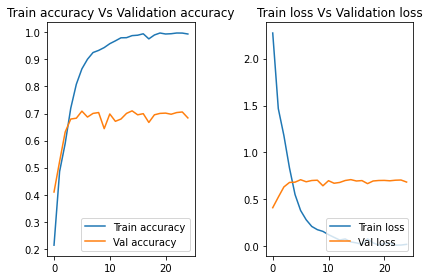

In [52]:
train_accuracy = history.history['accuracy']
train_loss     = history.history['loss'] 

val_accuracy   = history.history['val_accuracy']
val_loss       = history.history['val_accuracy']

plt.subplot(1,2,1)
plt.plot(range(epochs), train_accuracy, label='Train accuracy')
plt.plot(range(epochs), val_accuracy, label='Val accuracy')
plt.title('Train accuracy Vs Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(range(epochs), train_loss, label='Train loss')
plt.plot(range(epochs), val_loss, label='Val loss')
plt.title('Train loss Vs Validation loss')
plt.legend(loc='lower right')

plt.tight_layout()



* Not much of fluctuations are seen
* More epochs can be done
* However train accuracy >>> val accuracy, possibility of overfit

Model2 - add Batch normalization on Model1


In [53]:
#Specify the input shape with dimensions
Channels = 3
input_shape = (image_height, image_width, Channels)

#Number of classes of plant seedlings
num_classes=len(labels)

#Instantiate the schema
model = Sequential()

#Add input layer with rescaling performed
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0, input_shape=input_shape))

#First convolution layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Second convolution layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

#Third convolution layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Fourth convolution layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Fifth convolution layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#sixth convolution layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layyer
model.add(Flatten())

#Dense network
model.add(Dense(units=256))
model.add(Activation('relu'))

#output layer
model.add(Dense(units=num_classes))
model.add(Activation('softmax'))


In [54]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'],
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None
)

In [57]:
epochs=50
batch_size=32
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/50
120/120 [==============================] - 14s 119ms/step - loss: 0.0480 - accuracy: 0.9841 - val_loss: 2.1445 - val_accuracy: 0.7787
Epoch 2/50
120/120 [==============================] - 14s 119ms/step - loss: 0.0304 - accuracy: 0.9875 - val_loss: 2.0973 - val_accuracy: 0.7745
Epoch 3/50
120/120 [==============================] - 14s 119ms/step - loss: 0.0173 - accuracy: 0.9932 - val_loss: 1.8918 - val_accuracy: 0.7912
Epoch 4/50
120/120 [==============================] - 14s 120ms/step - loss: 0.0142 - accuracy: 0.9943 - val_loss: 1.9107 - val_accuracy: 0.8048
Epoch 5/50
120/120 [==============================] - 14s 120ms/step - loss: 0.0144 - accuracy: 0.9943 - val_loss: 2.0180 - val_accuracy: 0.7965
Epoch 6/50
120/120 [==============================] - 14s 120ms/step - loss: 0.0135 - accuracy: 0.9950 - val_loss: 1.9074 - val_accuracy: 0.8079
Epoch 7/50
120/120 [==============================] - 14s 121ms/step - loss: 0.0123 - accuracy: 0.9948 - val_loss: 2.1809 - val_ac

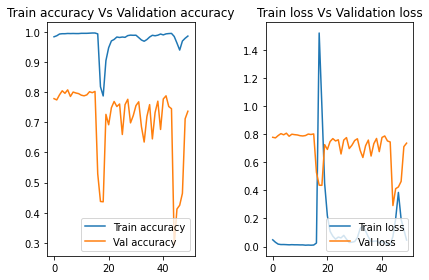

In [58]:
train_accuracy = history.history['accuracy']
train_loss     = history.history['loss'] 

val_accuracy   = history.history['val_accuracy']
val_loss       = history.history['val_accuracy']

plt.subplot(1,2,1)
plt.plot(range(epochs), train_accuracy, label='Train accuracy')
plt.plot(range(epochs), val_accuracy, label='Val accuracy')
plt.title('Train accuracy Vs Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(range(epochs), train_loss, label='Train loss')
plt.plot(range(epochs), val_loss, label='Val loss')
plt.title('Train loss Vs Validation loss')
plt.legend(loc='lower right')

plt.tight_layout()



- After 40 epochs, there has been a dip in the accuracy
- Less than 40 could have been a better choice for this model architecture

<u> Model2 </u> <br>
Train accuracy - 98.64%  <br>
Train loss - 0.0461  <br>

Val accuracy - 73.70%  <br>
val_loss = 3.56  <br>

- Still overfitting is witnessed, add dropouts instead of batchnormalization
- Dropout can be used after convolutional layers (e.g. Conv2D) and after pooling layers (e.g. MaxPooling2D). Often, dropout is only used after the pooling layers, but this is just a rough heuristic.

Model-3

In [89]:
#Specify the input shape with dimensions
Channels = 3
input_shape = (image_height, image_width, Channels)

#Number of classes of plant seedlings
num_classes=len(labels)

#Instantiate the schema
model = Sequential()

#Add input layer with rescaling performed
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0, input_shape=input_shape))

#First convolution layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#Second convolution layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Third convolution layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#Fourth convolution layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#Fifth convolution layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#sixth convolution layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#Flatten layyer
model.add(Flatten())

#Dense network
model.add(Dense(units=256))
model.add(Activation('relu'))

#output layer
model.add(Dense(units=num_classes))
model.add(Activation('softmax'))


In [90]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'],
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None
)

In [91]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 120, 120, 3)       0         
                                                                 
 conv2d_60 (Conv2D)          (None, 120, 120, 32)      896       
                                                                 
 activation_80 (Activation)  (None, 120, 120, 32)      0         
                                                                 
 conv2d_61 (Conv2D)          (None, 120, 120, 32)      9248      
                                                                 
 activation_81 (Activation)  (None, 120, 120, 32)      0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                     

In [ ]:
epochs=40
batch_size=32
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/40
120/120 [==============================] - 7s 51ms/step - loss: 2.4173 - accuracy: 0.1414 - val_loss: 2.4214 - val_accuracy: 0.1232
Epoch 2/40
120/120 [==============================] - 6s 53ms/step - loss: 1.7535 - accuracy: 0.3950 - val_loss: 1.4810 - val_accuracy: 0.4864
Epoch 3/40
120/120 [==============================] - 5s 46ms/step - loss: 1.1847 - accuracy: 0.6011 - val_loss: 0.9843 - val_accuracy: 0.6493
Epoch 4/40
120/120 [==============================] - 5s 46ms/step - loss: 0.8986 - accuracy: 0.6935 - val_loss: 0.8784 - val_accuracy: 0.6921
Epoch 5/40
120/120 [==============================] - 5s 45ms/step - loss: 0.7123 - accuracy: 0.7548 - val_loss: 0.9639 - val_accuracy: 0.6754
Epoch 6/40
120/120 [==============================] - 5s 45ms/step - loss: 0.6257 - accuracy: 0.7775 - val_loss: 0.7447 - val_accuracy: 0.7453
Epoch 7/40
120/120 [==============================] - 5s 45ms/step - loss: 0.5131 - accuracy: 0.8174 - val_loss: 0.7481 - val_accuracy: 0.7505

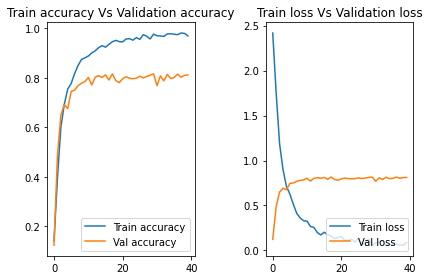

In [94]:
train_accuracy = history.history['accuracy']
train_loss     = history.history['loss'] 

val_accuracy   = history.history['val_accuracy']
val_loss       = history.history['val_accuracy']

plt.subplot(1,2,1)
plt.plot(range(epochs), train_accuracy, label='Train accuracy')
plt.plot(range(epochs), val_accuracy, label='Val accuracy')
plt.title('Train accuracy Vs Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(range(epochs), train_loss, label='Train loss')
plt.plot(range(epochs), val_loss, label='Val loss')
plt.title('Train loss Vs Validation loss')
plt.legend(loc='lower right')

plt.tight_layout()



<u> Model3 </u> <br>
Train accuracy - 98.15%  <br>
Train loss - 0.0607  <br>

Val accuracy - 80.27%  <br>
val_loss = 1.07  <br>

Adding drop outs gives better accuracy - val acuracy has imporved by 7%

<u> Model-4 - Data augmentation layers </u>

<b>
Idea: No new images are created but same image will have 50% chance to get flipped horizontally or vertically so chances are learning the features will be more </b> <br>

Achieved using <br>
<b> tf.keras.layers.experimental.preprocessing </b>


In [97]:
#Specify the input shape with dimensions
Channels = 3
input_shape = (image_height, image_width, Channels)

#Number of classes of plant seedlings
num_classes=len(labels)

#Instantiate the schema
model = Sequential()

#Add input layer with rescaling performed
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0))

#layers.experimental.preprocessing.RandomFlip() - A preprocessing layer which randomly flips images during training.
#layers.experimental.preprocessing.RandomRotation() - A preprocessing layer which randomly rotates images during training.
model.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"))
model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.2))

#In first layer - we mention the rescaling factor
#then we set the layers for randomflip and randomrotation
#then in first conv layer, we specify the input shape of the data that would be passed

#First convolution layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=input_shape))
model.add(Activation('relu'))


#Second convolution layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Third convolution layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#Fourth convolution layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#Fifth convolution layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#sixth convolution layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#Flatten layyer
model.add(Flatten())

#Dense network
model.add(Dense(units=256))
model.add(Activation('relu'))

#output layer
model.add(Dense(units=num_classes))
model.add(Activation('softmax'))


In [98]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'],
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None
)

In [100]:
epochs=40
batch_size=32
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/40
120/120 [==============================] - 11s 70ms/step - loss: 2.4319 - accuracy: 0.1312 - val_loss: 2.4349 - val_accuracy: 0.1180
Epoch 2/40
120/120 [==============================] - 8s 69ms/step - loss: 2.0863 - accuracy: 0.2919 - val_loss: 1.5418 - val_accuracy: 0.4395
Epoch 3/40
120/120 [==============================] - 8s 67ms/step - loss: 1.4633 - accuracy: 0.5061 - val_loss: 1.2610 - val_accuracy: 0.5501
Epoch 4/40
120/120 [==============================] - 8s 68ms/step - loss: 1.1610 - accuracy: 0.6115 - val_loss: 1.0189 - val_accuracy: 0.6388
Epoch 5/40
120/120 [==============================] - 8s 67ms/step - loss: 1.0179 - accuracy: 0.6559 - val_loss: 0.9099 - val_accuracy: 0.6868
Epoch 6/40
120/120 [==============================] - 8s 67ms/step - loss: 0.8961 - accuracy: 0.6903 - val_loss: 0.8941 - val_accuracy: 0.6942
Epoch 7/40
120/120 [==============================] - 8s 67ms/step - loss: 0.8284 - accuracy: 0.7235 - val_loss: 0.8070 - val_accuracy: 0.711

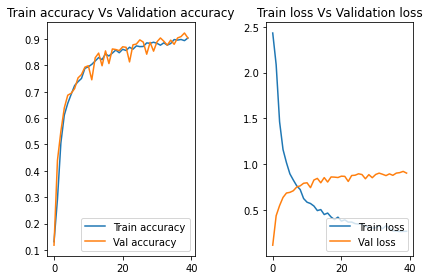

In [102]:
train_accuracy = history.history['accuracy']
train_loss     = history.history['loss'] 

val_accuracy   = history.history['val_accuracy']
val_loss       = history.history['val_accuracy']

plt.subplot(1,2,1)
plt.plot(range(epochs), train_accuracy, label='Train accuracy')
plt.plot(range(epochs), val_accuracy, label='Val accuracy')
plt.title('Train accuracy Vs Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(range(epochs), train_loss, label='Train loss')
plt.plot(range(epochs), val_loss, label='Val loss')
plt.title('Train loss Vs Validation loss')
plt.legend(loc='lower right')

plt.tight_layout()



* Adding the randomflip and randomrotation has generalized the model really well
* Model is not overfitting on training data as train accuracy is almost equal to validaiton accuracy 
* Validation accuracy has increased by 10% <br>

* > Model4 </u> <br>
Train accuracy - 90.37%  <br>
Train loss - 0.269  <br>
Val accuracy - 90.40%  <br>
val_loss = 0.26  <br>



Model 5

We have class imbalance in the training dataset available. 
Let's try to handle the class imbalance and see if it impacts the model positively.

In [106]:
class_count

{'Common Chickweed': 611,
 'Maize': 221,
 'Scentless Mayweed': 517,
 'Loose Silky-bent': 654,
 'Small-flowered Cranesbill': 516,
 'Fat Hen': 475,
 'Sugar beet': 385,
 'Common wheat': 221,
 'Shepherds Purse': 241,
 'Cleavers': 287,
 'Black-grass': 273,
 'Charlock': 390}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

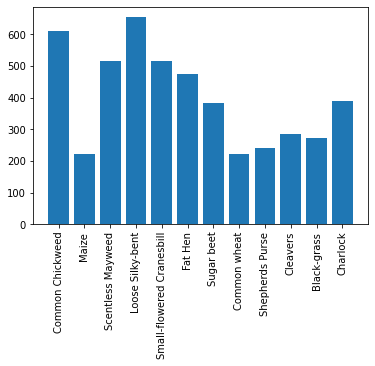

In [105]:
plt.bar(class_count.keys(), class_count.values())
plt.xticks(rotation=90)

Augmentor package 
https://augmentor.readthedocs.io/en/stable/userguide/usage.html#step-1-create-a-new-pipeline

In [107]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
import Augmentor

In [115]:
for i in labels:
  img_dir = train_dir_path + '/' + i
  print(img_dir)
  p = Augmentor.Pipeline(img_dir)
  p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
  p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

/content/gdrive/MyDrive/plant-seedlings-classification/train/Common Chickweed
Initialised with 611 image(s) found.
Output directory set to /content/gdrive/MyDrive/plant-seedlings-classification/train/Common Chickweed/output.

Processing <PIL.Image.Image image mode=RGB size=103x103 at 0x7FD9A2595250>: 100%|██████████| 500/500 [00:21<00:00, 22.83 Samples/s]


/content/gdrive/MyDrive/plant-seedlings-classification/train/Maize
Initialised with 221 image(s) found.
Output directory set to /content/gdrive/MyDrive/plant-seedlings-classification/train/Maize/output.

Processing <PIL.Image.Image image mode=RGB size=170x170 at 0x7FDB0B809F10>: 100%|██████████| 500/500 [01:41<00:00,  4.93 Samples/s]


/content/gdrive/MyDrive/plant-seedlings-classification/train/Scentless Mayweed
Initialised with 517 image(s) found.
Output directory set to /content/gdrive/MyDrive/plant-seedlings-classification/train/Scentless Mayweed/output.

Processing <PIL.Image.Image image mode=RGB size=376x376 at 0x7FD9A259FE10>: 100%|██████████| 500/500 [00:24<00:00, 20.63 Samples/s]


/content/gdrive/MyDrive/plant-seedlings-classification/train/Loose Silky-bent
Initialised with 654 image(s) found.
Output directory set to /content/gdrive/MyDrive/plant-seedlings-classification/train/Loose Silky-bent/output.

Processing <PIL.Image.Image image mode=RGB size=88x88 at 0x7FDA9A1E0FD0>: 100%|██████████| 500/500 [01:40<00:00,  4.96 Samples/s]


/content/gdrive/MyDrive/plant-seedlings-classification/train/Small-flowered Cranesbill
Initialised with 516 image(s) found.
Output directory set to /content/gdrive/MyDrive/plant-seedlings-classification/train/Small-flowered Cranesbill/output.

Processing <PIL.Image.Image image mode=RGB size=278x278 at 0x7FDAD0C3AD50>: 100%|██████████| 500/500 [00:38<00:00, 13.02 Samples/s]


/content/gdrive/MyDrive/plant-seedlings-classification/train/Fat Hen
Initialised with 475 image(s) found.
Output directory set to /content/gdrive/MyDrive/plant-seedlings-classification/train/Fat Hen/output.

Processing <PIL.Image.Image image mode=RGB size=154x154 at 0x7FDA9A0DA050>: 100%|██████████| 500/500 [00:33<00:00, 14.89 Samples/s]


/content/gdrive/MyDrive/plant-seedlings-classification/train/Sugar beet
Initialised with 385 image(s) found.
Output directory set to /content/gdrive/MyDrive/plant-seedlings-classification/train/Sugar beet/output.

Processing <PIL.Image.Image image mode=RGB size=834x834 at 0x7FDA9A0DB9D0>: 100%|██████████| 500/500 [01:46<00:00,  4.70 Samples/s]


/content/gdrive/MyDrive/plant-seedlings-classification/train/Common wheat
Initialised with 221 image(s) found.
Output directory set to /content/gdrive/MyDrive/plant-seedlings-classification/train/Common wheat/output.

Processing <PIL.Image.Image image mode=RGB size=156x156 at 0x7FDB0B863D50>: 100%|██████████| 500/500 [01:11<00:00,  6.95 Samples/s]


/content/gdrive/MyDrive/plant-seedlings-classification/train/Shepherds Purse
Initialised with 241 image(s) found.
Output directory set to /content/gdrive/MyDrive/plant-seedlings-classification/train/Shepherds Purse/output.

Processing <PIL.Image.Image image mode=RGB size=143x143 at 0x7FDB0C57FE50>: 100%|██████████| 500/500 [00:39<00:00, 12.51 Samples/s]


/content/gdrive/MyDrive/plant-seedlings-classification/train/Cleavers
Initialised with 287 image(s) found.
Output directory set to /content/gdrive/MyDrive/plant-seedlings-classification/train/Cleavers/output.

Processing <PIL.Image.Image image mode=RGB size=358x358 at 0x7FDB0C384A50>: 100%|██████████| 500/500 [00:32<00:00, 15.58 Samples/s]


/content/gdrive/MyDrive/plant-seedlings-classification/train/Black-grass
Initialised with 273 image(s) found.
Output directory set to /content/gdrive/MyDrive/plant-seedlings-classification/train/Black-grass/output.

Processing <PIL.Image.Image image mode=RGB size=975x975 at 0x7FDB0B854FD0>: 100%|██████████| 500/500 [02:39<00:00,  3.13 Samples/s]


/content/gdrive/MyDrive/plant-seedlings-classification/train/Charlock
Initialised with 390 image(s) found.
Output directory set to /content/gdrive/MyDrive/plant-seedlings-classification/train/Charlock/output.

Processing <PIL.Image.Image image mode=RGB size=1216x1216 at 0x7FD998D872D0>: 100%|██████████| 500/500 [01:15<00:00,  6.60 Samples/s]


In [118]:
for i in labels:
  img_dir = train_dir_path + '/' + i + '/output'
  print(f"{img_dir} has {len(os.listdir(img_dir))} images")
  print(f"Total count is {len(os.listdir(img_dir)) + len(os.listdir(train_dir_path + '/' + i))} images")

/content/gdrive/MyDrive/plant-seedlings-classification/train/Common Chickweed/output has 500 images
Total count is 1112 images
/content/gdrive/MyDrive/plant-seedlings-classification/train/Maize/output has 500 images
Total count is 722 images
/content/gdrive/MyDrive/plant-seedlings-classification/train/Scentless Mayweed/output has 500 images
Total count is 1018 images
/content/gdrive/MyDrive/plant-seedlings-classification/train/Loose Silky-bent/output has 500 images
Total count is 1155 images
/content/gdrive/MyDrive/plant-seedlings-classification/train/Small-flowered Cranesbill/output has 500 images
Total count is 1017 images
/content/gdrive/MyDrive/plant-seedlings-classification/train/Fat Hen/output has 500 images
Total count is 976 images
/content/gdrive/MyDrive/plant-seedlings-classification/train/Sugar beet/output has 500 images
Total count is 886 images
/content/gdrive/MyDrive/plant-seedlings-classification/train/Common wheat/output has 500 images
Total count is 722 images
/content

Model 5 - On augmented + existing images

In [119]:
batch_size   = 32
image_height = 120
image_width  = 120

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=1702,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10791 files belonging to 12 classes.
Using 8633 files for training.


In [17]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
            train_dir_path,
            labels="inferred",
            label_mode="categorical",
            class_names=None,
            color_mode="rgb",
            batch_size=batch_size,
            image_size=(image_height, image_width),
            shuffle=True,
            seed=1702,
            validation_split=0.2,
            subset="validation",
            interpolation="bilinear",
            follow_links=False,
            crop_to_aspect_ratio=False
        )

Found 10791 files belonging to 12 classes.
Using 2158 files for validation.


Use the previous model using tf.keras.layers.experimental.preprocessing to do randomflip and rotation

In [124]:
#Specify the input shape with dimensions
Channels = 3
input_shape = (image_height, image_width, Channels)

#Number of classes of plant seedlings
num_classes=len(labels)

#Instantiate the schema
model = Sequential()

#Add input layer with rescaling performed
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0))

#layers.experimental.preprocessing.RandomFlip() - A preprocessing layer which randomly flips images during training.
#layers.experimental.preprocessing.RandomRotation() - A preprocessing layer which randomly rotates images during training.
model.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"))
model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.2))

#In first layer - we mention the rescaling factor
#then we set the layers for randomflip and randomrotation
#then in first conv layer, we specify the input shape of the data that would be passed

#First convolution layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=input_shape))
model.add(Activation('relu'))


#Second convolution layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Third convolution layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#Fourth convolution layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#Fifth convolution layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#sixth convolution layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#Flatten layyer
model.add(Flatten())

#Dense network
model.add(Dense(units=256))
model.add(Activation('relu'))

#output layer
model.add(Dense(units=num_classes))
model.add(Activation('softmax'))


In [125]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'],
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None
)

In [127]:
#Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.
#Dataset.prefetch() overlaps data preprocessing and model execution while training.
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [128]:
epochs=40
batch_size=32
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/40
270/270 [==============================] - 126s 157ms/step - loss: 2.4750 - accuracy: 0.1066 - val_loss: 2.4716 - val_accuracy: 0.1043
Epoch 2/40
270/270 [==============================] - 18s 68ms/step - loss: 1.8512 - accuracy: 0.3302 - val_loss: 1.5181 - val_accuracy: 0.4560
Epoch 3/40
270/270 [==============================] - 18s 67ms/step - loss: 1.3209 - accuracy: 0.5239 - val_loss: 1.0282 - val_accuracy: 0.6330
Epoch 4/40
270/270 [==============================] - 18s 68ms/step - loss: 1.0104 - accuracy: 0.6344 - val_loss: 0.9854 - val_accuracy: 0.6715
Epoch 5/40
270/270 [==============================] - 18s 67ms/step - loss: 0.8659 - accuracy: 0.6961 - val_loss: 0.7329 - val_accuracy: 0.7502
Epoch 6/40
270/270 [==============================] - 18s 68ms/step - loss: 0.7601 - accuracy: 0.7336 - val_loss: 0.6544 - val_accuracy: 0.7808
Epoch 7/40
270/270 [==============================] - 18s 68ms/step - loss: 0.6737 - accuracy: 0.7672 - val_loss: 0.5888 - val_accurac

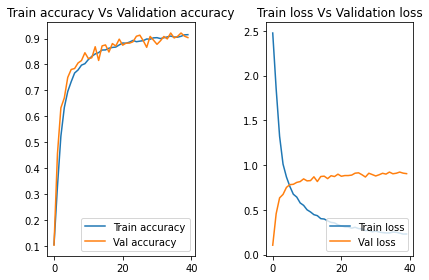

In [129]:
train_accuracy = history.history['accuracy']
train_loss     = history.history['loss'] 

val_accuracy   = history.history['val_accuracy']
val_loss       = history.history['val_accuracy']

plt.subplot(1,2,1)
plt.plot(range(epochs), train_accuracy, label='Train accuracy')
plt.plot(range(epochs), val_accuracy, label='Val accuracy')
plt.title('Train accuracy Vs Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(range(epochs), train_loss, label='Train loss')
plt.plot(range(epochs), val_loss, label='Val loss')
plt.title('Train loss Vs Validation loss')
plt.legend(loc='lower right')

plt.tight_layout()



Not seeing much of improvement 

Model 6 - add early stopping & reducelrplateau callbacks

In [13]:
#Specify the input shape with dimensions
Channels = 3
input_shape = (image_height, image_width, Channels)

#Number of classes of plant seedlings
num_classes=len(labels)

#Instantiate the schema
model = Sequential()

#Add input layer with rescaling performed
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0))

#layers.experimental.preprocessing.RandomFlip() - A preprocessing layer which randomly flips images during training.
#layers.experimental.preprocessing.RandomRotation() - A preprocessing layer which randomly rotates images during training.
model.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"))
model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.2))

#In first layer - we mention the rescaling factor
#then we set the layers for randomflip and randomrotation
#then in first conv layer, we specify the input shape of the data that would be passed

#First convolution layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=input_shape))
model.add(Activation('relu'))


#Second convolution layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Third convolution layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#Fourth convolution layer
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#Fifth convolution layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#sixth convolution layer
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))


#Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#Flatten layyer
model.add(Flatten())

#Dense network
model.add(Dense(units=256))
model.add(Activation('relu'))

#output layer
model.add(Dense(units=num_classes))
model.add(Activation('softmax'))


In [14]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'],
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None
)

In [18]:
#Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.
#Dataset.prefetch() overlaps data preprocessing and model execution while training.
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=15,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",
    factor=0.6,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=1e-5,
)

model_path = 'CV_model/'
if not os.path.exists(model_path):
  os.mkdir(model_path)

filepath = model_path + 'model-{epoch:.5d}-{loss:.5f}-{val_loss:.5f}.h5'


modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor = "val_loss",
    verbose = 1,
    save_best_only = True,
    save_weights_only = False,
    mode = "auto",
    save_freq="epoch",
    options=None,
    initial_value_threshold=None
)

callback_list = [early_stopping, lr, modelcheckpoint]

In [ ]:
epochs=40
batch_size=32
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, verbose=1, callbacks=callback_list)

Epoch 1/40


In [ ]:
train_accuracy = history.history['accuracy']
train_loss     = history.history['loss'] 

val_accuracy   = history.history['val_accuracy']
val_loss       = history.history['val_accuracy']

plt.subplot(1,2,1)
plt.plot(range(epochs), train_accuracy, label='Train accuracy')
plt.plot(range(epochs), val_accuracy, label='Val accuracy')
plt.title('Train accuracy Vs Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(range(epochs), train_loss, label='Train loss')
plt.plot(range(epochs), val_loss, label='Val loss')
plt.title('Train loss Vs Validation loss')
plt.legend(loc='lower right')

plt.tight_layout()

